In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')


In [263]:
connection = sqlite3.connect('inventory.db')

df = pd.read_sql_query("select * from vendor_sales_summary", connection)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,23.86,36.99,750.0,8,190.88,18.0,665.82,295.92,2.00,27.08,474.94,71.331591,2.250000,3.488160
1,2,"IRA GOLDMAN AND WILLIAMS, LLP",90609,Flavor Essence Variety 5 Pak,17.00,24.99,162.5,320,5440.00,24.0,599.76,449.82,0.52,27.08,-4840.24,-807.029478,0.075000,0.110250
2,54,AAPER ALCOHOL & CHEMICAL CO,990,Ethyl Alcohol 200 Proof,105.07,134.49,3750.0,1,105.07,0.0,0.00,0.00,0.00,0.48,-105.07,-inf,0.000000,0.000000
3,60,ADAMBA IMPORTS INTL INC,771,Bak's Krupnik Honey Liqueur,11.44,14.99,750.0,39,446.16,47.0,704.53,494.67,37.01,367.52,258.37,36.672675,1.205128,1.579097
4,60,ADAMBA IMPORTS INTL INC,3401,Vesica Vodka,11.10,14.99,1750.0,6,66.60,0.0,0.00,0.00,0.00,367.52,-66.60,-inf,0.000000,0.000000


### Exploratory Data Analysis

- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be
included in the final analysis.

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns,
identify anomalies, and ensure data quality before proceeding with further analysis.

In [264]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


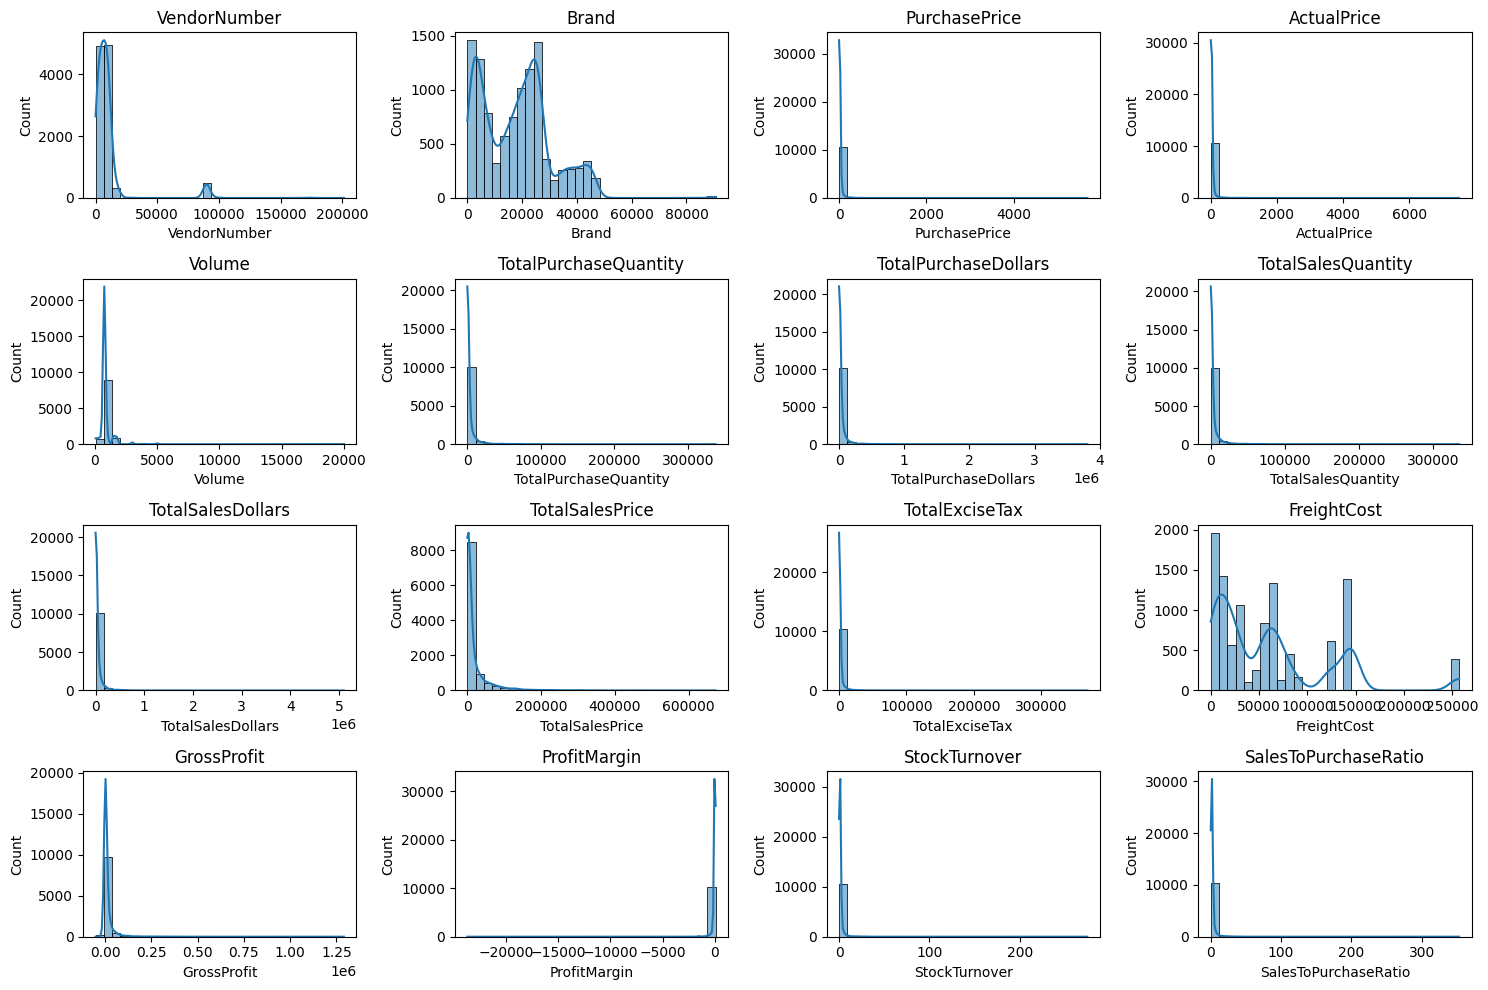

In [265]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

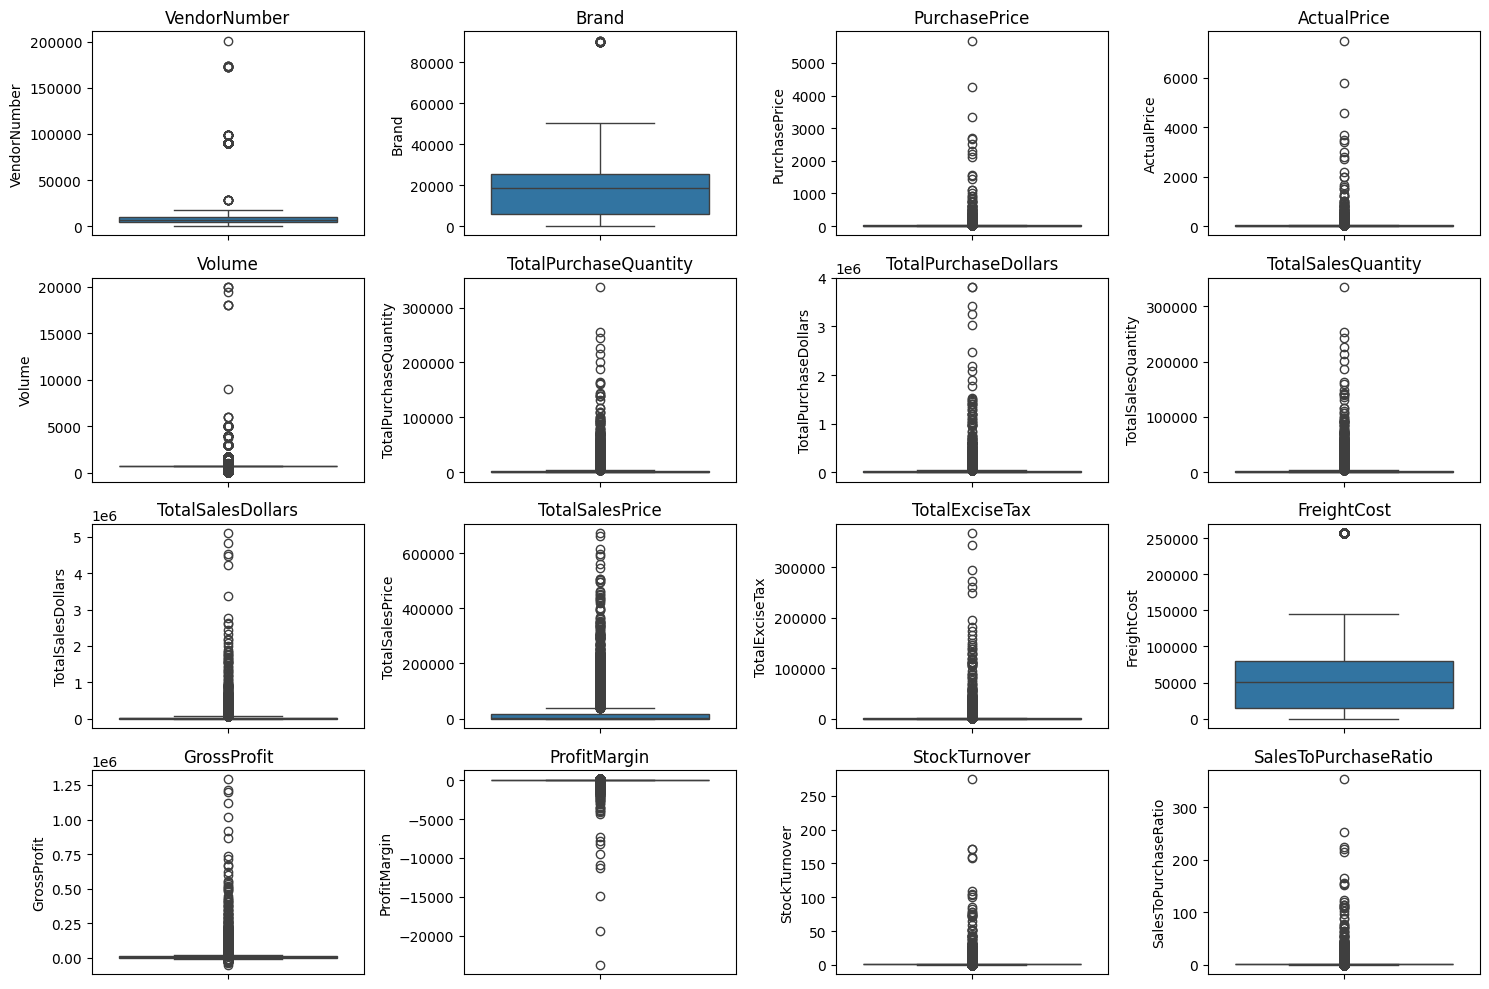

In [266]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Summary Statistics Insights:

### Negative & Zero Values:

- Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts
lower than the purchase price ..
- Profit Margin: Has a minimum of -co, which suggests cases where revenue is zero or even lower than costs.
- Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete
stock.

### Outliers Indicated by High Standard Deviations:

- Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium
products.
- Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
- Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that
Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [267]:
df = pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""",connection)

In [268]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",90085,Ch Lilian 09 Ladouys St Este,23.86,36.99,750.0,8,190.88,18.0,665.82,295.92,2.00,27.08,474.94,71.331591,2.250000,3.488160
1,60,ADAMBA IMPORTS INTL INC,771,Bak's Krupnik Honey Liqueur,11.44,14.99,750.0,39,446.16,47.0,704.53,494.67,37.01,367.52,258.37,36.672675,1.205128,1.579097
2,105,ALTAMAR BRANDS LLC,2529,Right Gin,23.25,29.99,750.0,12,279.00,12.0,359.88,59.98,9.44,62.39,80.88,22.474158,1.000000,1.289892
3,105,ALTAMAR BRANDS LLC,8412,Tequila Ocho Plata Fresno,35.71,49.99,750.0,320,11427.20,307.0,15346.93,12947.41,242.15,62.39,3919.73,25.540808,0.959375,1.343018
4,200,AMERICAN SPIRITS EXCHANGE,20789,Zin-phomaniac Znfdl,9.73,14.99,750.0,96,934.08,84.0,1511.16,287.84,9.43,6.19,577.08,38.187882,0.875000,1.617806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,172662,SWEETWATER FARM,2191,Clark & Chesterfield Whiskey,14.70,19.99,375.0,138,2028.60,125.0,2498.75,1819.09,49.00,178.34,470.15,18.815408,0.905797,1.231761
8560,172662,SWEETWATER FARM,2265,Monadnock Moonshine,21.47,28.99,750.0,267,5732.49,222.0,6435.78,5363.15,175.13,178.34,703.29,10.927813,0.831461,1.122685
8561,172662,SWEETWATER FARM,3632,Ashuelot Vodka,21.58,28.49,750.0,554,11955.32,452.0,12877.48,8205.12,356.14,178.34,922.16,7.161028,0.815884,1.077134
8562,173357,TAMWORTH DISTILLING,3909,White Mountain Vodka,19.37,24.99,750.0,1232,23863.84,982.0,24540.18,14469.21,773.87,202.50,676.34,2.756052,0.797078,1.028342


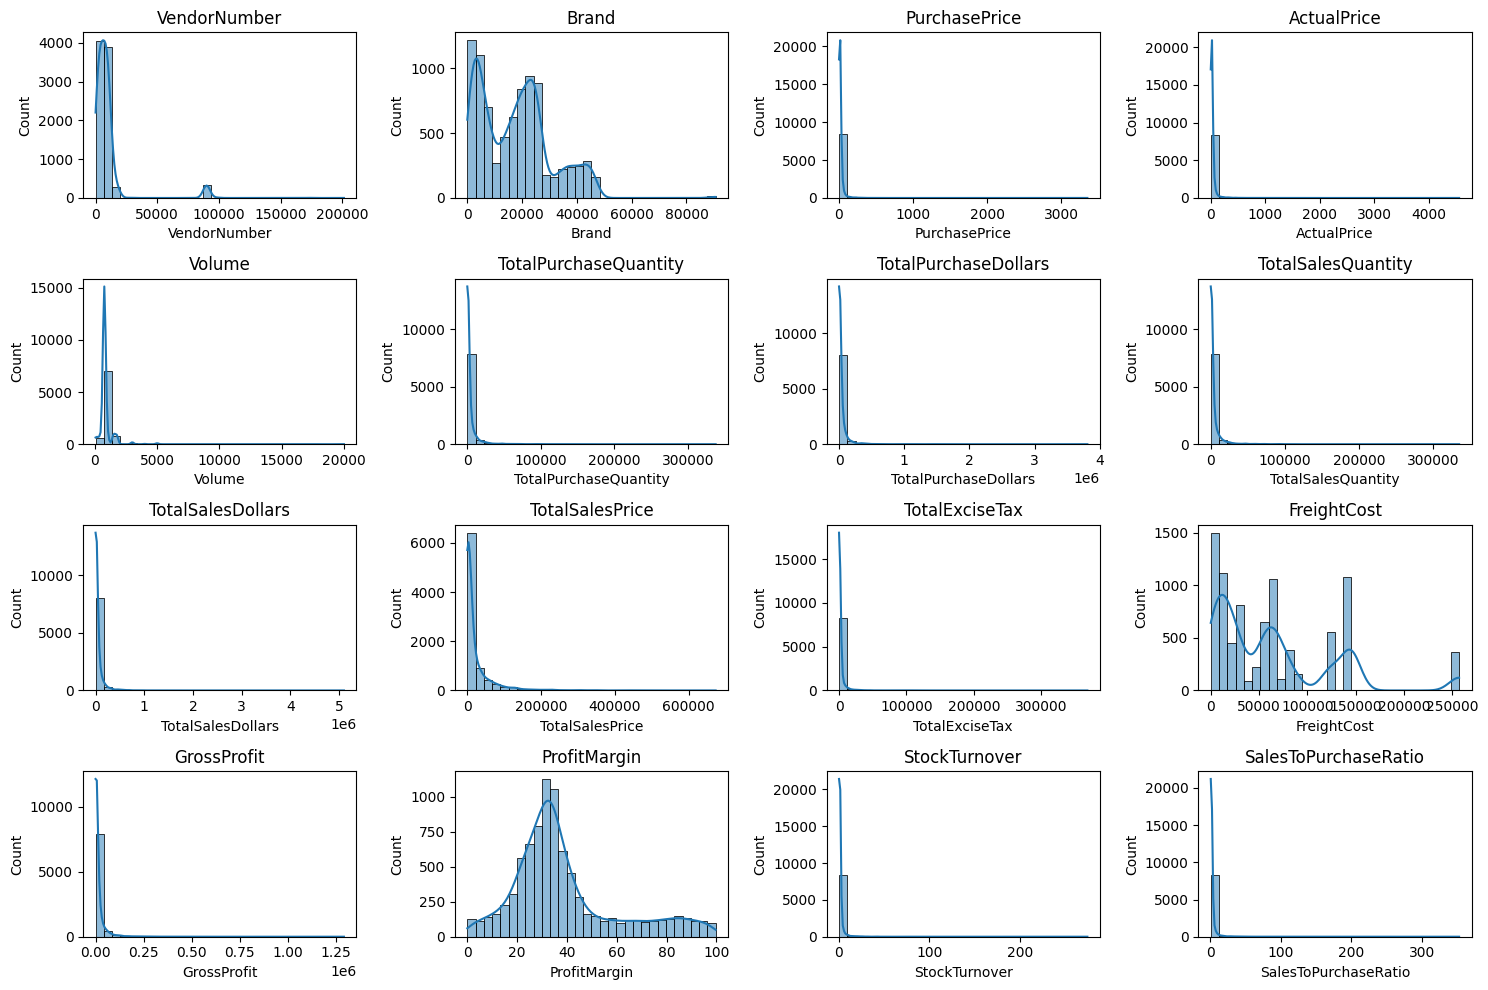

In [269]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

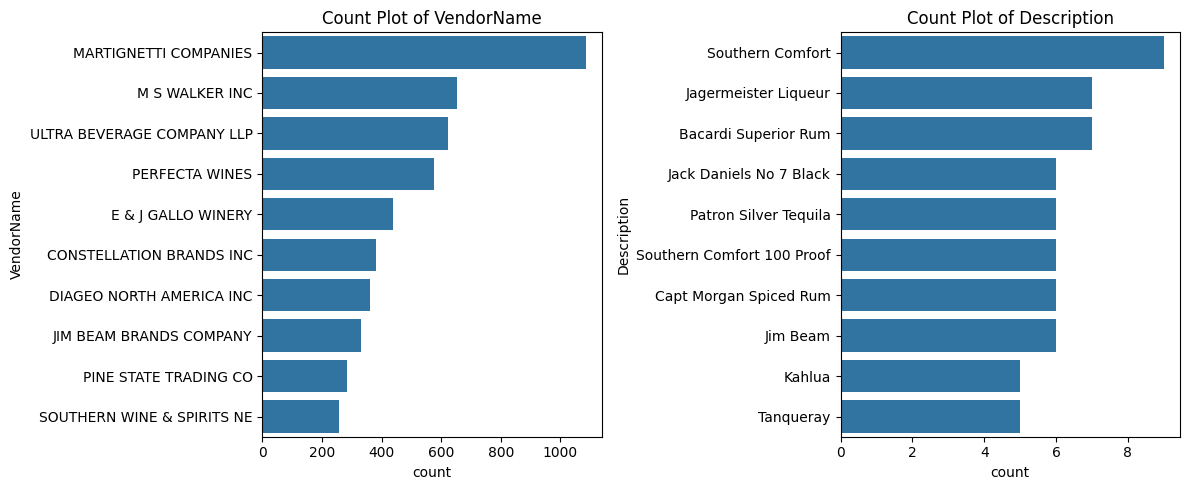

In [270]:

categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

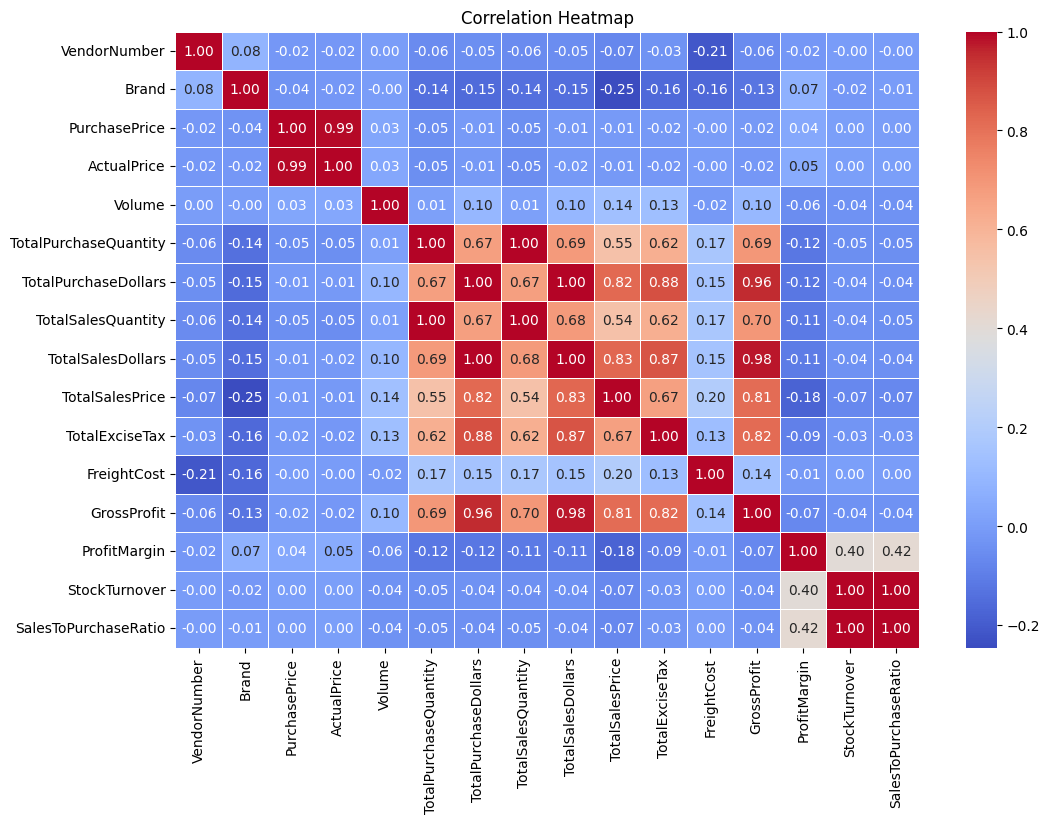

In [271]:
plt.figure(figsize=(12, 8))

correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Correlation Insights

- PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact
sales revenue or profit.
- Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
- Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive
pricing pressures.
- StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily
result in higher profitability.

### Data Analysis
Identify Brands that needs Promotional or Pricing Adjustments which exibit lower sales performance but higher profit margins.

In [272]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'}).reset_index()

In [273]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [274]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [275]:
low_sales_threshold

np.float64(560.299)

In [276]:
high_margin_threshold

np.float64(64.97017552750113)

In [277]:
targeted_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) & 
    (brand_performance['ProfitMargin'] >= high_margin_threshold)]
print("Brands with low sales but high profit margins:")
display(targeted_brands.sort_values(by='TotalSalesDollars', ascending=True))

Brands with low sales but high profit margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [278]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]

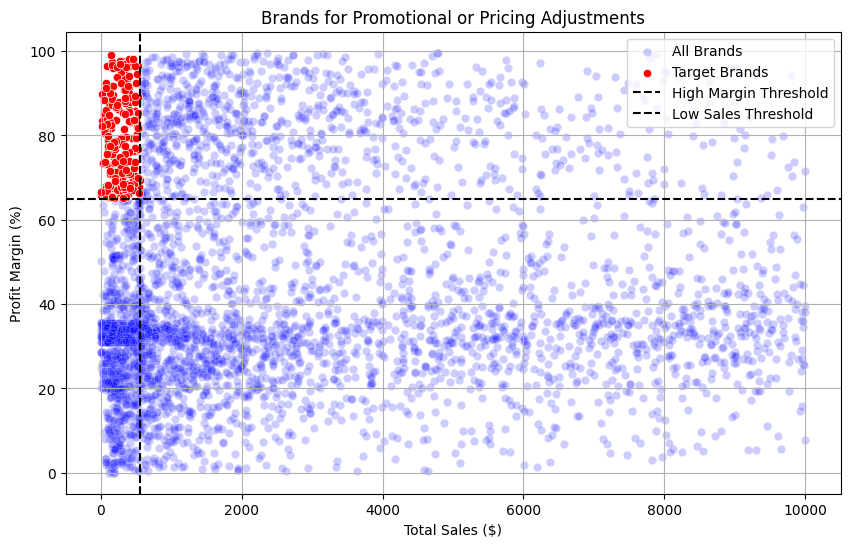

In [279]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance , x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=targeted_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

Which vendors and brands demonstrate the highest sales performance?

In [280]:
top_vendors = df.groupby('VendorName') ["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [281]:
top_brands = df.groupby('Description') ["TotalSalesDollars"].sum().nlargest(10)
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [282]:
def format_dollars(value):
    if value >= 1_00_000:
        return f"${value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"${value/1_000:.2f}K"
    else:
        return str(value)

In [283]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    $7.96M
Tito's Handmade Vodka      $7.40M
Grey Goose Vodka           $7.21M
Capt Morgan Spiced Rum     $6.36M
Absolut 80 Proof           $6.24M
Jameson Irish Whiskey      $5.72M
Ketel One Vodka            $5.07M
Baileys Irish Cream        $4.15M
Kahlua                     $3.60M
Tanqueray                  $3.46M
Name: TotalSalesDollars, dtype: object

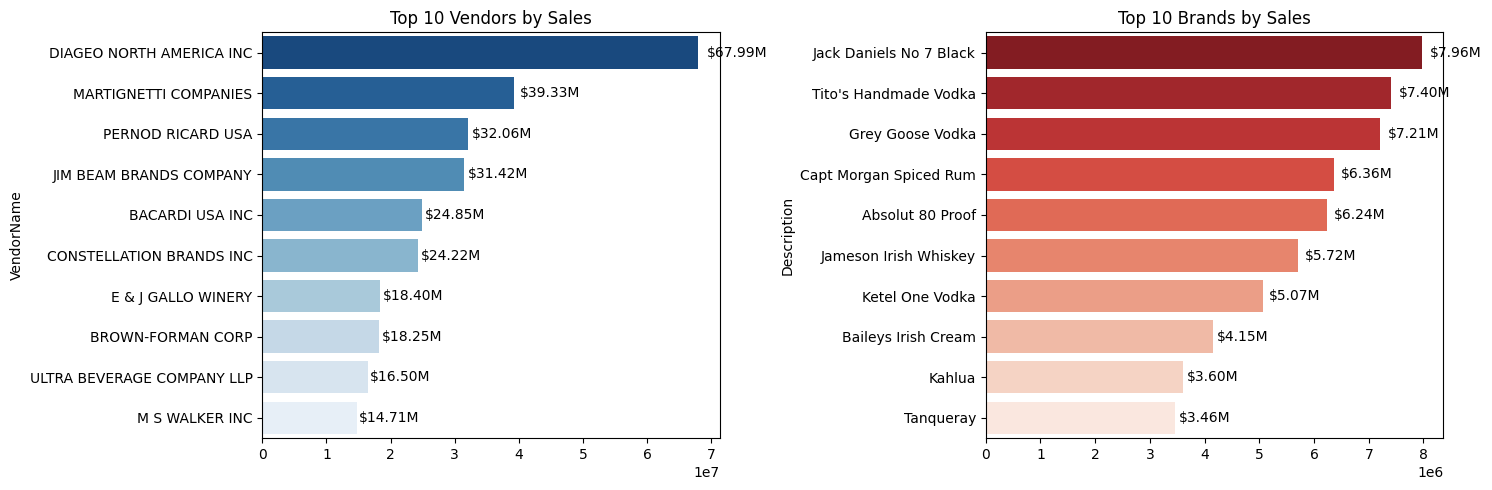

In [284]:
plt.figure(figsize=(15,5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width()+(bar.get_width() *0.02),
            bar.get_y() + bar.get_height() / 2,
            format_dollars(bar.get_width()),
            ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 =sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width()+(bar.get_width() *0.02),
            bar.get_y() + bar.get_height() / 2,
            format_dollars(bar.get_width()),
            ha='left', va='center', fontsize=10, color='black')
    
plt.tight_layout()
plt.show()

Which vendors contribute the most to total purchase dollars?

In [285]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
    }).reset_index()
vendor_performance.shape

(119, 4)

In [286]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum() * 100

In [287]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending=False),2)

In [288]:
top_vendors = vendor_performance.head(10)
top_vendors ['TotalSalesDollars'] = top_vendors ['TotalSalesDollars'].apply(format_dollars)
top_vendors ['TotalPurchaseDollars'] = top_vendors ['TotalPurchaseDollars'].apply(format_dollars)
top_vendors ['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,$50.10M,$17.89M,$67.99M,16.30
57,MARTIGNETTI COMPANIES,$25.50M,$13.83M,$39.33M,8.30
68,PERNOD RICARD USA,$23.85M,$8.21M,$32.06M,7.76
46,JIM BEAM BRANDS COMPANY,$23.49M,$7.93M,$31.42M,7.64
6,BACARDI USA INC,$17.43M,$7.42M,$24.85M,5.67
20,CONSTELLATION BRANDS INC,$15.27M,$8.95M,$24.22M,4.97
11,BROWN-FORMAN CORP,$13.24M,$5.01M,$18.25M,4.31
30,E & J GALLO WINERY,$12.07M,$6.33M,$18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,$11.17M,$5.34M,$16.50M,3.63
53,M S WALKER INC,$9.76M,$4.94M,$14.71M,3.18


In [289]:
top_vendors['PurchaseContribution%'].sum()

np.float64(65.69000000000001)

In [290]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,$50.10M,$17.89M,$67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,$25.50M,$13.83M,$39.33M,8.30,24.60
68,PERNOD RICARD USA,$23.85M,$8.21M,$32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,$23.49M,$7.93M,$31.42M,7.64,40.00
6,BACARDI USA INC,$17.43M,$7.42M,$24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,$15.27M,$8.95M,$24.22M,4.97,50.64
11,BROWN-FORMAN CORP,$13.24M,$5.01M,$18.25M,4.31,54.95
30,E & J GALLO WINERY,$12.07M,$6.33M,$18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,$11.17M,$5.34M,$16.50M,3.63,62.51
53,M S WALKER INC,$9.76M,$4.94M,$14.71M,3.18,65.69


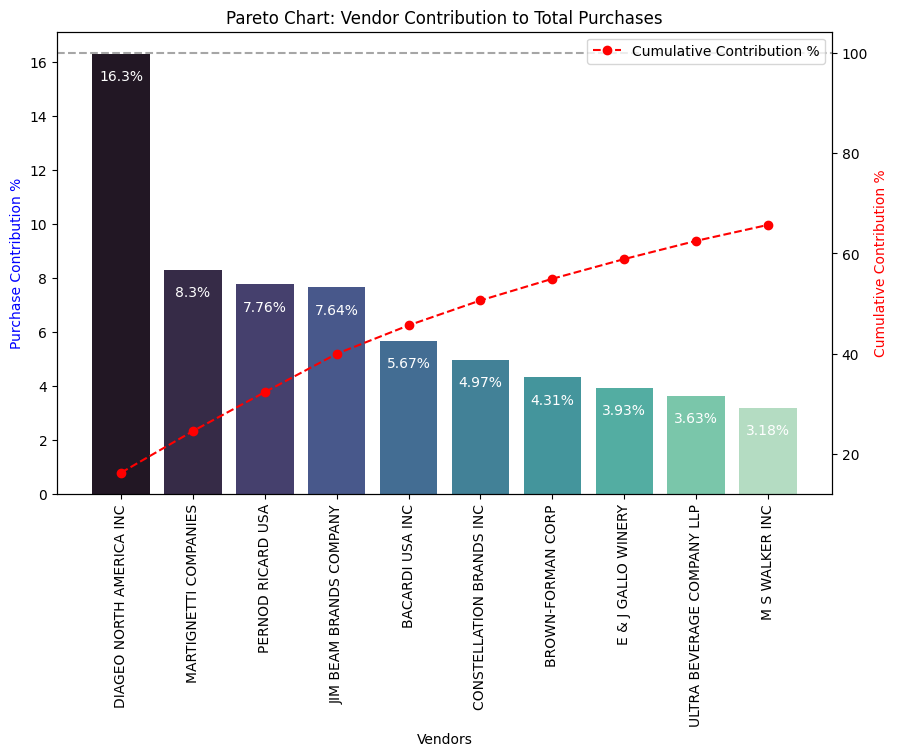

In [291]:
fig, ax1= plt.subplots(figsize=(10,6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%' ]):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 =ax1.twinx()
ax2.plot(top_vendors ['VendorName'], top_vendors['Cumulative_Contribution%' ], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

How much of total procurement is dependent on the top vendors?

In [292]:
print(f'Total Purchase Contribution of top 10 vendors is {round(top_vendors["PurchaseContribution%"].sum(), 2)}%')

Total Purchase Contribution of top 10 vendors is 65.69%


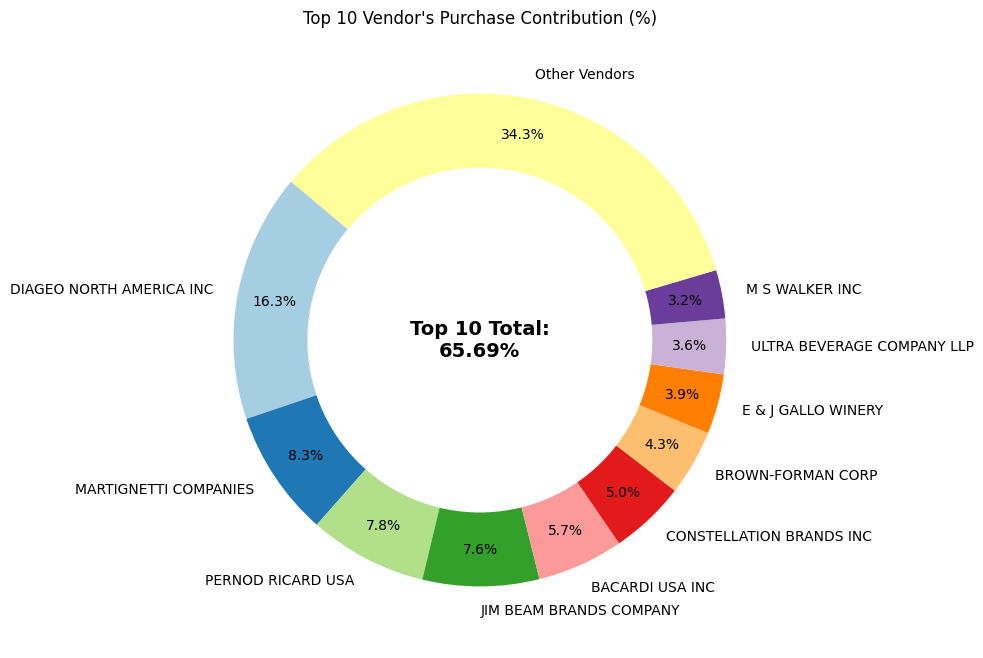

In [293]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                    startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost saving?

In [294]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [295]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small', 'Medium', 'Large'])

In [296]:
df[['OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Small,8
1,Small,39
2,Small,12
3,Medium,320
4,Medium,96
...,...,...
8559,Medium,138
8560,Medium,267
8561,Medium,554
8562,Medium,1232


In [298]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


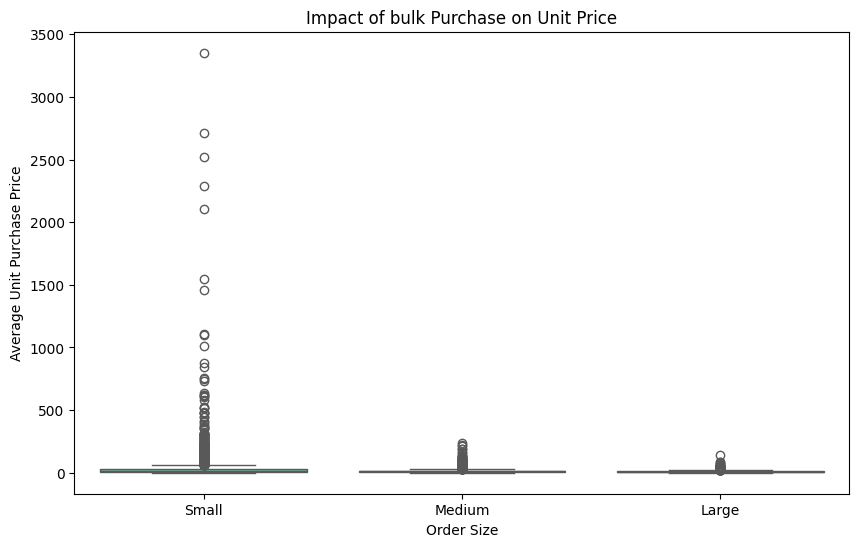

In [299]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='OrderSize', y='UnitPurchasePrice', palette="Set2")
plt.title("Impact of bulk Purchase on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

- Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference between Small and Large orders is substantial (~72% reduction in unit cost)
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit
revenue.

Which vendors have low inventory turnover, indicating excess stock and slow moving products?

In [301]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values(by='StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How much capital is locked in unsold per vendor, and which vendors contribute the most to it?

In [307]:
df['UnsoldInventoryValue'] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["UnitPurchasePrice"]
print('Total Unsold Capital:', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: $2.71M


In [310]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,$0.72M
46,JIM BEAM BRANDS COMPANY,$0.55M
68,PERNOD RICARD USA,$0.47M
116,WILLIAM GRANT & SONS INC,$0.40M
30,E & J GALLO WINERY,$0.23M
79,SAZERAC CO INC,$0.20M
11,BROWN-FORMAN CORP,$0.18M
20,CONSTELLATION BRANDS INC,$0.13M
61,MOET HENNESSY USA INC,$0.13M
77,REMY COINTREAU USA INC,$0.12M


What is the 95% confidence intervals for profit margins of top performing and low performing vendors?

In [311]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
top_threshold

np.float64(40622.1125)

In [312]:
low_threshold = df["TotalSalesDollars"].quantile(0.25)
low_threshold

np.float64(1355.58)

In [319]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]['ProfitMargin'].dropna()
top_vendors

5       16.999601
8       30.557678
13      30.827478
14      27.129385
17      24.329082
          ...    
8536    25.173464
8537    22.886164
8538    22.652408
8552    27.103538
8554    28.056879
Name: ProfitMargin, Length: 2141, dtype: float64

In [315]:
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()
low_vendors

0       71.331591
1       36.672675
2       22.474158
9       20.559532
10      64.915236
          ...    
8549    41.388657
8550    21.862972
8551    73.338465
8553    40.470235
8556    88.098999
Name: ProfitMargin, Length: 2141, dtype: float64

In [320]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) -1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


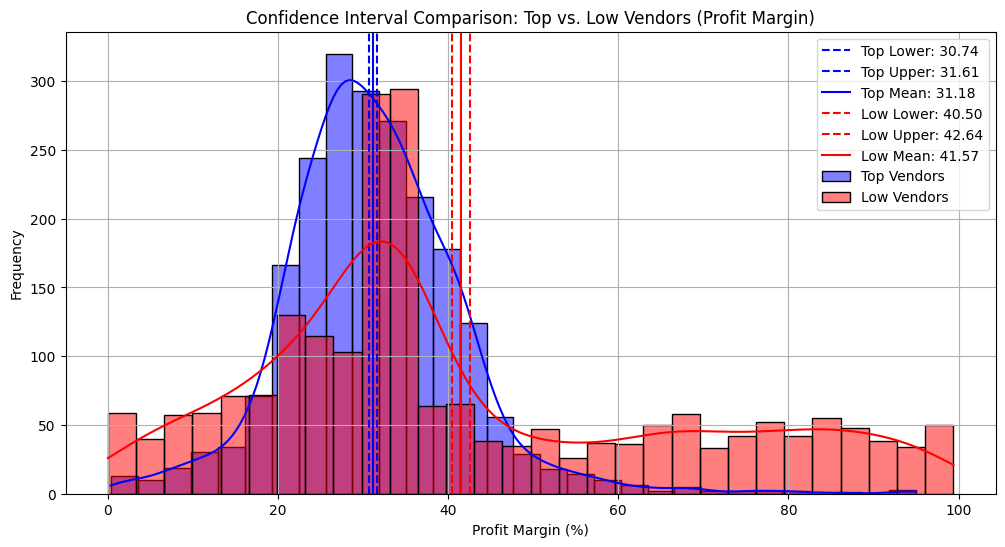

In [324]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower :.2f}, {top_upper :.2f}), Mean: {top_mean :.2f}")
print(f"Low Vendors 95% CI: ({low_lower :.2f}, {low_upper :.2f}), Mean: {low_mean :.2f}")

plt.figure(figsize=(12,6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower :.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper :.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean :.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower :.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper :.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean :.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

- The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
- For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved
distribution strategies.

### Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H₁ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [326]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df [df["TotalSalesDollars"] >= top_threshold] ["ProfitMargin"].dropna()
low_vendors = df [df ["TotalSalesDollars"] <= low_threshold] ["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat :.4f}, P-Value: {p_value :.4f}")
if p_value < 0.05:
    print("Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject He: No significant difference in profit margins.")

T-Statistic: -17.6695, P-Value: 0.0000
Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.
